In [ ]:
# Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data.
# Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
bank_df = pd.read_csv('/content/banking.csv')

In [ ]:
print(bank_df.head())

   age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu  ...         1    999         0  nonexistent   
1  cellular   nov         fri  ...         1    999         0  nonexistent   
2  cellular   jun         thu  ...         3      6         2      success   
3  cellular   apr         fri  ...         2    999         0  nonexistent   
4  cellular   aug         fri  ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          1.4   

In [ ]:
print(bank_df.tail())

       age         job  marital            education  default housing loan  \
41183   59     retired  married          high.school  unknown      no  yes   
41184   31   housemaid  married             basic.4y  unknown      no   no   
41185   42      admin.   single    university.degree  unknown     yes  yes   
41186   48  technician  married  professional.course       no      no  yes   
41187   25     student   single          high.school       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
41183  telephone   jun         thu  ...         1    999         0   
41184  telephone   may         thu  ...         2    999         0   
41185  telephone   may         wed  ...         3    999         0   
41186  telephone   oct         tue  ...         2    999         0   
41187  telephone   may         fri  ...         4    999         0   

          poutcome emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
41183  nonexistent          1.4  

In [ ]:
# Check for missing values
print(bank_df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


In [ ]:
# Data Preprocessing
# Check for non-numeric columns
non_numeric_columns = bank_df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [ ]:
# Encoding categorical variables
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    bank_df[column] = label_encoder.fit_transform(bank_df[column])

In [ ]:
# Splitting the dataset into features and target variable
X = bank_df.drop('y', axis=1)
y = bank_df['y']

In [ ]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Building the Decision Tree classifier
# Building the Decision Tree classifier with max_depth
clf = DecisionTreeClassifier(random_state=42, max_depth=3)

In [ ]:
# Training the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# Making predictions on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9043457149793639


In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7295
           1       0.59      0.56      0.57       943

    accuracy                           0.90      8238
   macro avg       0.76      0.75      0.76      8238
weighted avg       0.90      0.90      0.90      8238



In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[6921  374]
 [ 414  529]]


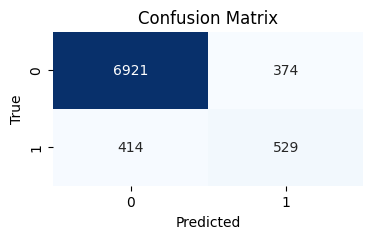

In [ ]:
# Plotting confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

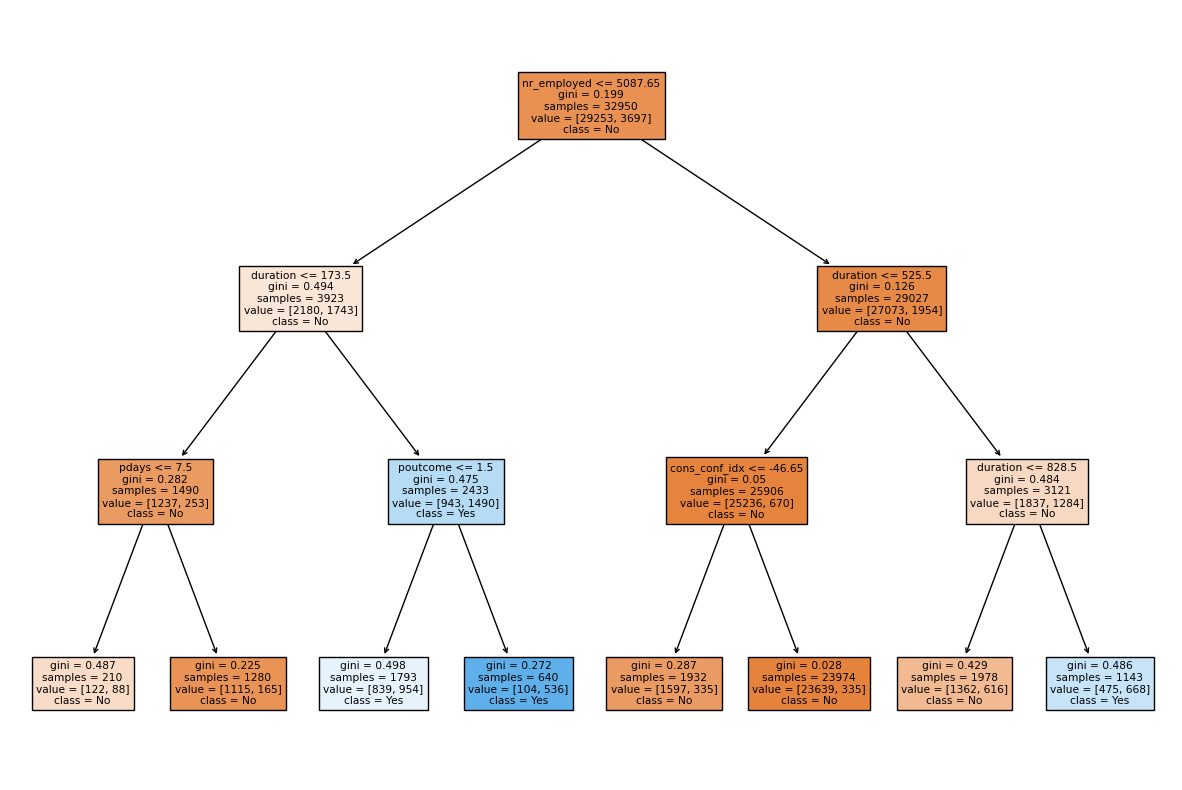

In [ ]:
# Plotting the decision tree
plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()